<a href="https://colab.research.google.com/github/kalyan8324/Deep_learning/blob/main/bank_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [6]:
df['EstimatedSalary'].astype('float')

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [7]:
df[df['Exited'] == 0].shape

(7963, 11)

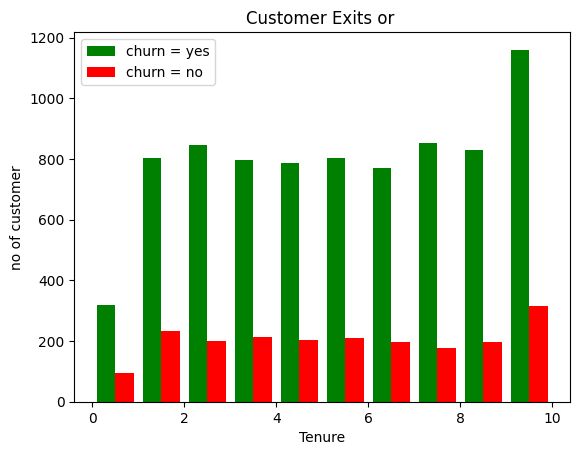

In [8]:
tenure_churn_yes = df[df.Exited ==0].Tenure
tenure_churn_no = df[df.Exited == 1].Tenure
plt.xlabel('Tenure')
plt.ylabel('no of customer')
plt.title("Customer Exits or ")
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['churn = yes', 'churn = no'])
plt.legend()

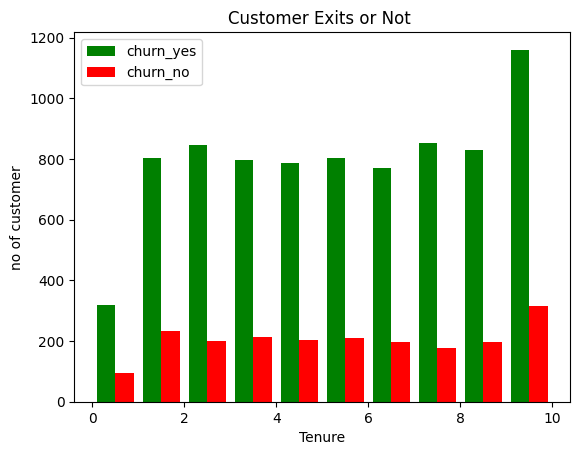

In [9]:
Salary_churn_yes = df[df.Exited ==0].EstimatedSalary
Salary_churn_no = df[df.Exited == 1].EstimatedSalary
plt.xlabel('Tenure')
plt.ylabel('no of customer')
plt.title("Customer Exits or Not ")
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['churn_yes', 'churn_no'])
plt.legend()

In [10]:
df['Gender'].replace(to_replace={'Male':1,'Female':0},inplace=True)
df['Geography'].replace(to_replace={'France':2,'Spain':1,'Germany':0},inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,2,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,2,0,42,8,159660.80,3,1,0,113931.57,1
3,699,2,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

To Scale our model

In [12]:
df['EstimatedSalary'].shape

(10000,)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[scale_col] = scaler.fit_transform(df[scale_col])

In [14]:
for i in df.columns:
  print(f'{i}:{df[i].unique()}')

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [15]:
x = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [16]:
X_train[:5]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7751,0.800,1,0,0.283784,0.6,0.000000,0.333333,0,0,0.096273
4154,0.752,2,1,0.216216,0.3,0.000000,0.333333,1,0,0.981478
3881,0.476,2,0,0.621622,0.3,0.000000,0.000000,1,1,0.948551
9238,0.846,2,0,0.432432,0.4,0.000000,0.333333,1,0,0.646869
5210,0.402,2,1,0.229730,0.7,0.517012,0.333333,0,0,0.434670


Build a artificial neural network

In [31]:
from tensorflow import keras
import tensorflow as tf

model = keras.Sequential([
    keras.Input(shape=(10, )),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
               optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 2ms/step - loss: 0.4945 - accuracy: 0.7968
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.8021
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8114
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8170
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8248
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8335
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8386
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8399
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8429
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3678 - accura

In [32]:
model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


array([[0.03951581],
       [0.08802858],
       [0.07072414],
       ...,
       [0.01993448],
       [0.01460336],
       [0.10587446]], dtype=float32)

In [33]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8515


[0.35310813784599304, 0.8514999747276306]

In [34]:
yp = model.predict(X_test)
X_test[:10]

63/63 [==============================] - 0s 1ms/step


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7054,0.838,1,1,0.270270,0.6,0.000000,0.333333,0,0,0.521961
442,0.368,2,0,0.216216,0.7,0.484466,0.333333,1,1,0.350871
3954,0.758,2,0,0.216216,0.9,0.526595,0.000000,0,1,0.527039
2288,0.538,2,0,0.162162,0.7,0.281904,0.000000,1,1,0.804763
3196,0.520,2,1,0.243243,0.4,0.515908,0.333333,1,0,0.513183
6178,1.000,0,0,0.297297,0.4,0.390559,0.333333,0,0,0.533448
8351,0.470,2,0,0.162162,0.6,0.000000,0.333333,1,1,0.688796
5658,0.794,1,1,0.310811,0.9,0.000000,0.000000,1,0,0.162112
2065,0.552,2,1,0.202703,0.8,0.000000,0.333333,1,0,0.692530
413,0.686,0,0,0.310811,0.9,0.723248,0.666667,1,1,0.939679


In [36]:
y_pred = []
for i in yp:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)
print(list(y_pred[:10]) ," \n", list(y_test[:10]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]


In [38]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [39]:
len(X_test)

2000

In [45]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.70      0.46      0.56       405

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



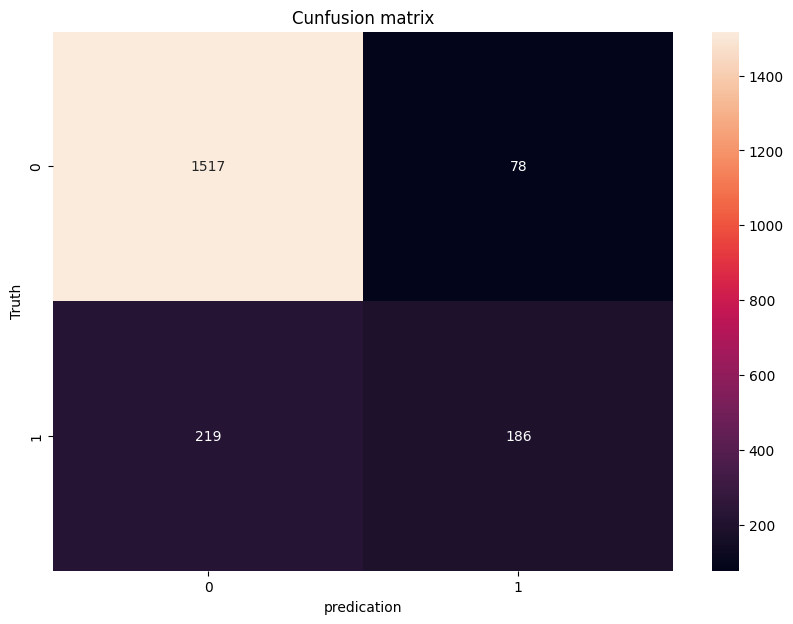

In [43]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10, 7))
plt.title('Cunfusion matrix')
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predication')
plt.ylabel('Truth')
plt.show()

In [44]:
len(y_test)

2000